In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json

In [22]:

import copy

child_last   = "└─── "
child_middle = "├─── "
space_pre    = "     "
middle_pre   = "│    "
def build_tree(obj, key='#', level=0, level_info = {}):
    if(level > 0):
        for i in range(level-1):
            if(level_info[i] == 'last'):
                print(space_pre, end="")
            else:
                print(middle_pre, end="")
        if(level_info[level-1] == 'last'):
            child_pre = child_last
        else:
            child_pre = child_middle
        print(child_pre, end="")
    
    if(key != '#'):
        print(key, end=": ")
    print(type(obj), end=" ")
    if(type(obj) is list):
        print("[{}]".format(len(obj)))
    else:
        print()
    if(type(obj) is dict):
        key_arr = list(obj.keys())
        for idx in range(len(key_arr)):
            li = copy.deepcopy(level_info)
            if(idx == len(key_arr)-1):
                li[level] = 'last'
            else:
                li[level] = 'middle'
            
            key = key_arr[idx]
            build_tree(obj[key], key=key, level = level + 1, level_info = li)
    elif(type(obj) is list):
        li = copy.deepcopy(level_info)
        li[level] = 'last'
        build_tree(obj[0], key='#', level = level + 1, level_info = li)

In [23]:
def plotface(datapoint):
    xrr = []
    yrr = []

    for keypoint in datapoint['face']:
        xrr.append(keypoint[0])
        yrr.append(keypoint[1])

    xrr = np.array(xrr)
    yrr = np.array(yrr)

    plt.scatter(xrr, yrr, s = 5)
    plt.xlim([xrr.min(), xrr.max()])
    plt.ylim([yrr.min(), yrr.max()])
    plt.gca().invert_yaxis()
    plt.gca().set_aspect('equal', adjustable='box')

In [30]:
def gaze__processOneSession(gaze_arr):
    xrr = []
    yrr = []
    for gaze in gaze_arr:
        xrr.append(gaze["gaze"]["x"])
        yrr.append(gaze["gaze"]["y"])
    return np.array(xrr), np.array(yrr)

In [24]:
path_root = "/home/arnab/MEGAsync/Eye Tracking/Data_Backup/saved_sessions_september_24/"

In [40]:
session_name = "session_2021-09-24T10:10:40.966059/session_2021-09-24T10:10:40.966059.json"
with open(path_root + session_name, 'r') as f:
    session = json.load(f)

In [41]:
build_tree(session)

<class 'dict'> 
└─── hdehheeafrlqlylodn58si: <class 'list'> [241]
     └─── <class 'dict'> 
          ├─── gaze: <class 'dict'> 
          │    ├─── x: <class 'float'> 
          │    └─── y: <class 'float'> 
          ├─── gazefeatures: <class 'dict'> 
          │    ├─── gaze: <class 'list'> [2]
          │    │    └─── <class 'int'> 
          │    └─── screen: <class 'list'> [2]
          │         └─── <class 'int'> 
          ├─── face: <class 'list'> [468]
          │    └─── <class 'list'> [3]
          │         └─── <class 'int'> 
          └─── timestamp: <class 'dict'> 
               ├─── hour: <class 'int'> 
               ├─── minute: <class 'int'> 
               ├─── seconds: <class 'int'> 
               └─── milliseconds: <class 'int'> 


In [42]:
datapoint = None
for id in session:
    print(id)
    for dp in session[id]:
        datapoint = dp
        break

hdehheeafrlqlylodn58si


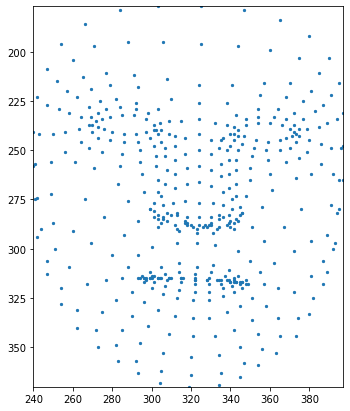

In [43]:
plotface(datapoint)

In [44]:
xrr, yrr = gaze__processOneSession(session['hdehheeafrlqlylodn58si'])
xrr.shape, yrr.shape



((241,), (241,))

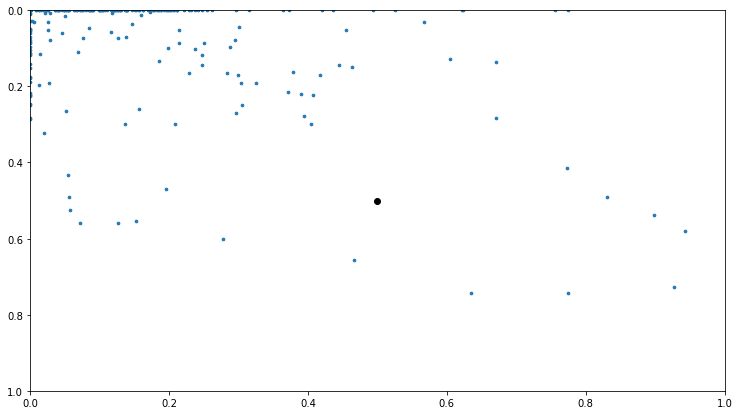

In [50]:
scle = 7
plt.rcParams["figure.figsize"] = (scle*16/9,scle)
plt.scatter(xrr, yrr, s=scle)
plt.xlim([0,1])
plt.ylim([0,1])
plt.gca().invert_yaxis()
plt.scatter(.5,.5, color='k')

In [52]:
marker_track = {
    "Position 1":   [.5, .5],
    "Position 2":   [.1, .1],	
    "Position 3":   [.8, .1],	
    "Position 4":	[.8, .8],	
    "Position 5":	[.1, .8],	
}

In [51]:
with open("session_track.json", 'r') as f:
    session_track = json.load(f)

In [53]:
def loadjson_session(session_name):
    folder = session_name.split('.')[0]
    with open(path_root + folder + "/" + session_name, r) as f:
        return json.load(f)

In [ ]:
for i in range(1, 6):
    key = "Position {}".format(i)
    glass_on = loadjson_session(session_track['P1'][key])
    glass_off = loadjson_session(session_track['P1_without_glasses'][key])

    